In [271]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [272]:
data = pd.read_csv('StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [273]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [274]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [275]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [277]:
data.gender.unique()

array(['female', 'male'], dtype=object)

In [278]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [279]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [280]:
# Get the total number of rows
no_of_rows = data.shape[0]

# Calculate the percentage of missing data for each column
percentage_of_missing_data = data.isnull().sum() / no_of_rows * 100

# Print the percentage of missing data
print(percentage_of_missing_data)


gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [281]:
#No of rows
data.shape[0]

1000

In [282]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <Axes: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=9.09E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=1.99E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=1.81E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=7.14E-03'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=5.79E-03'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

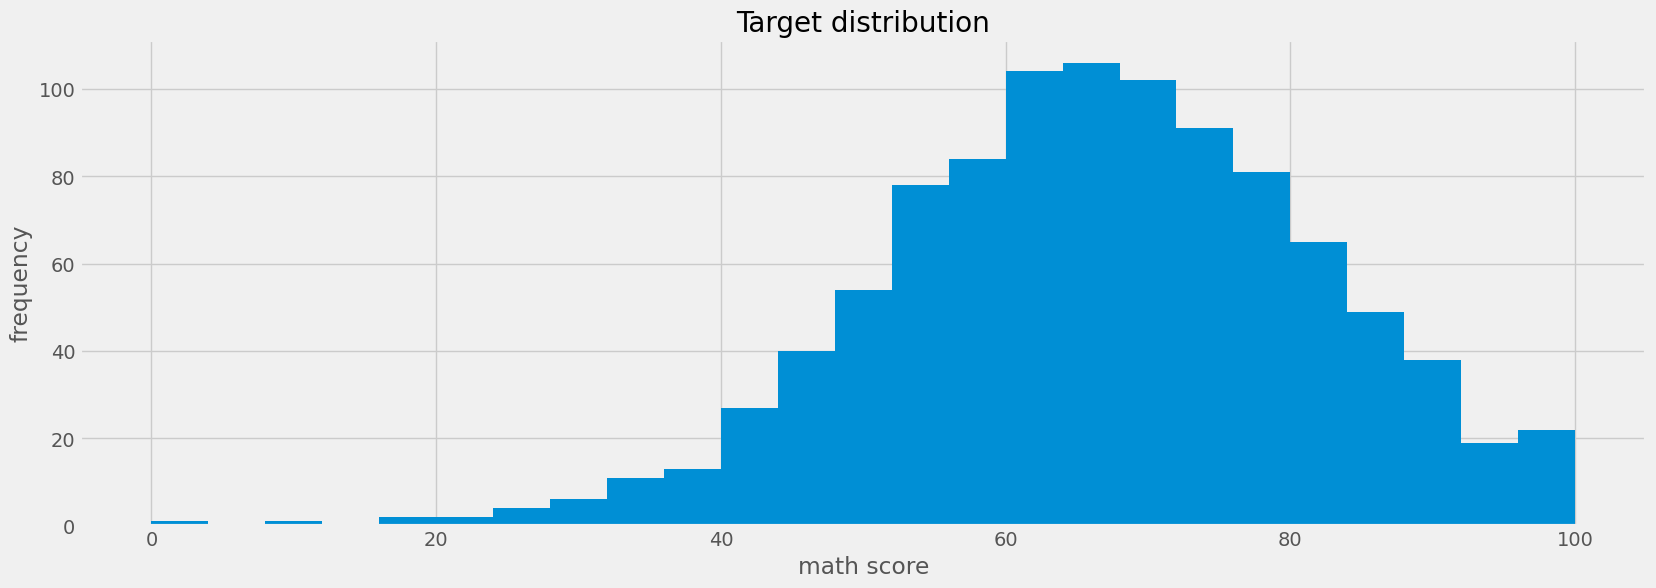

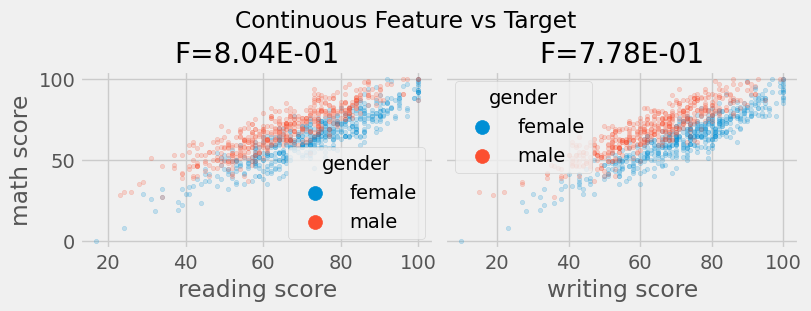

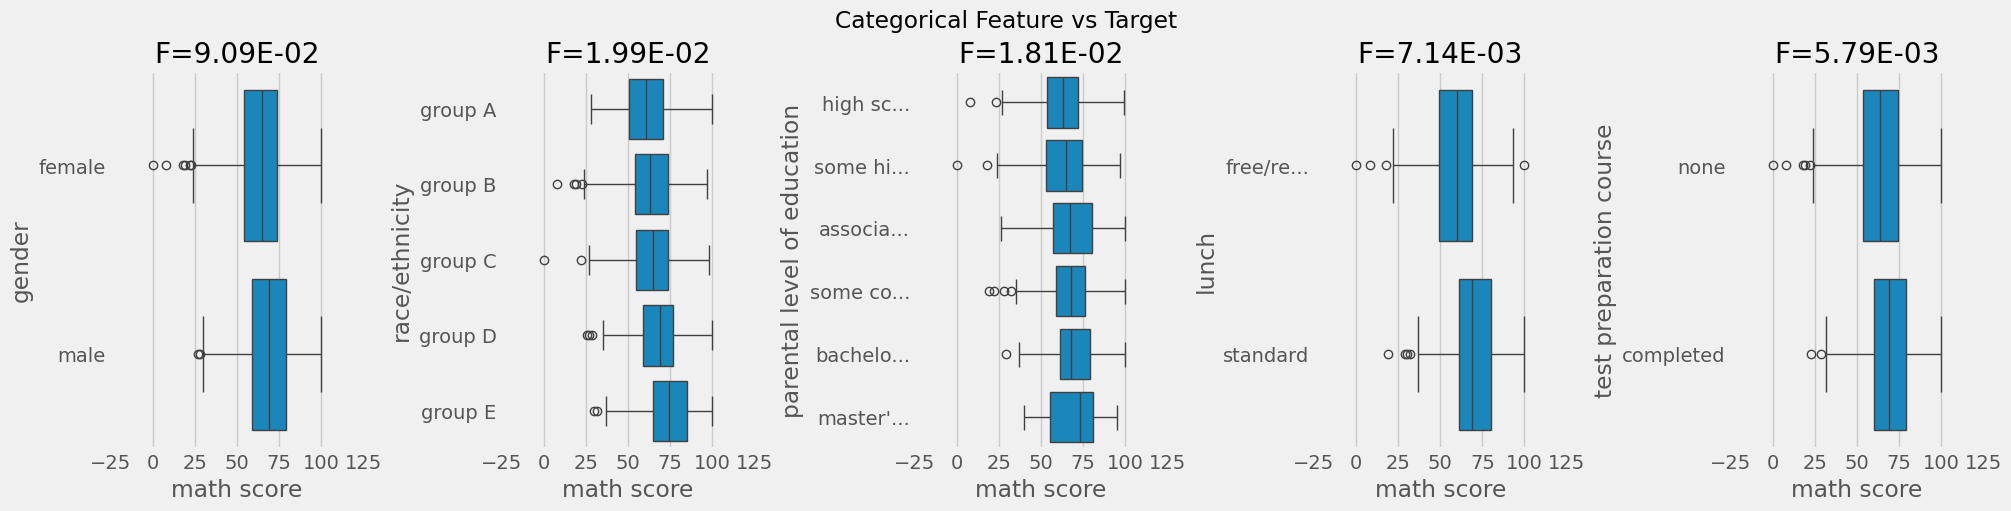

In [283]:
plt.rcParams['figure.figsize']=(18,6)
plt.style.use('fivethirtyeight')
dabl.plot(data,target_col='math score')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <Axes: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.04E-02'}, xlabel='reading score', ylabel='gender'>,
         <Axes: title={'center': 'F=2.89E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=2.15E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=9.50E-03'}, xlabel='reading score', ylabel='lunch'>,
         <Axes: title={'center': 'F=4.44E-03'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

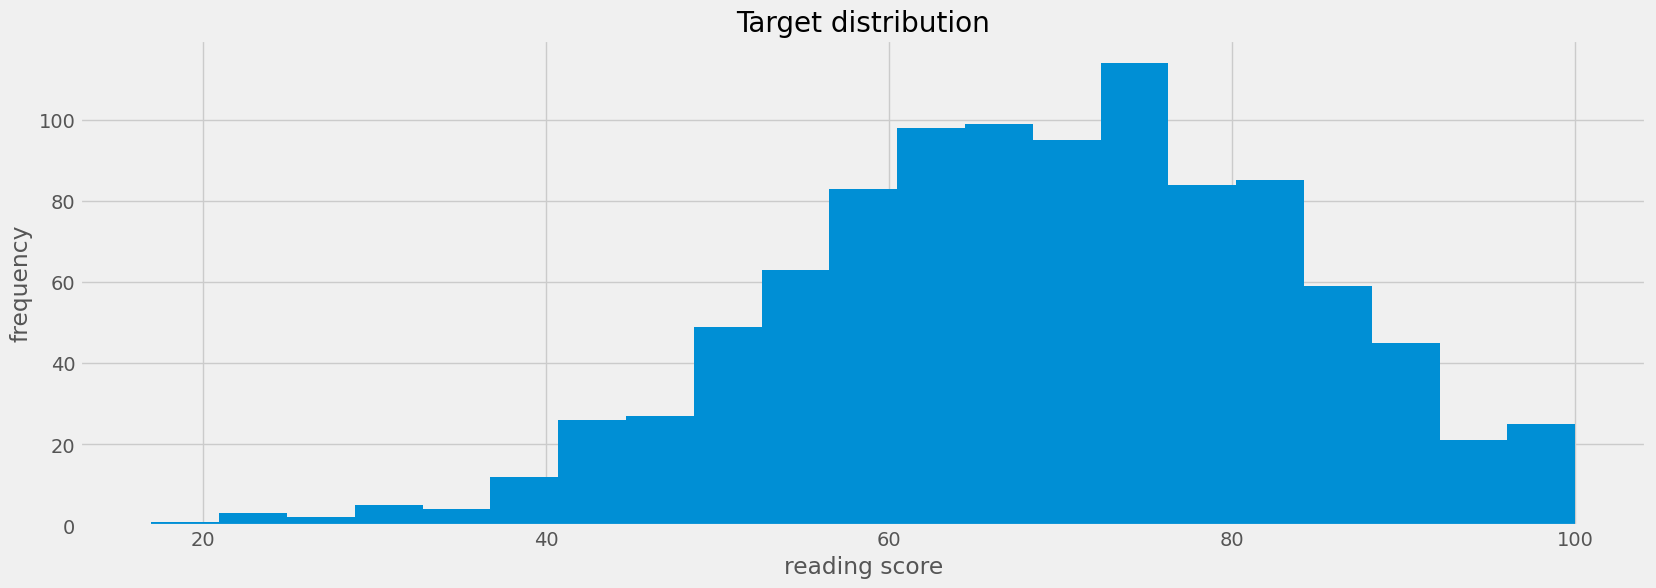

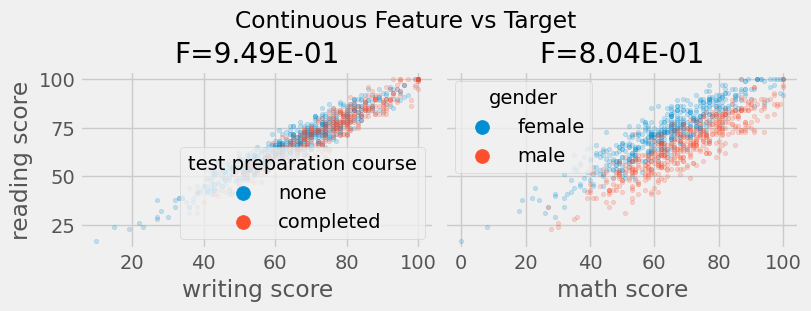

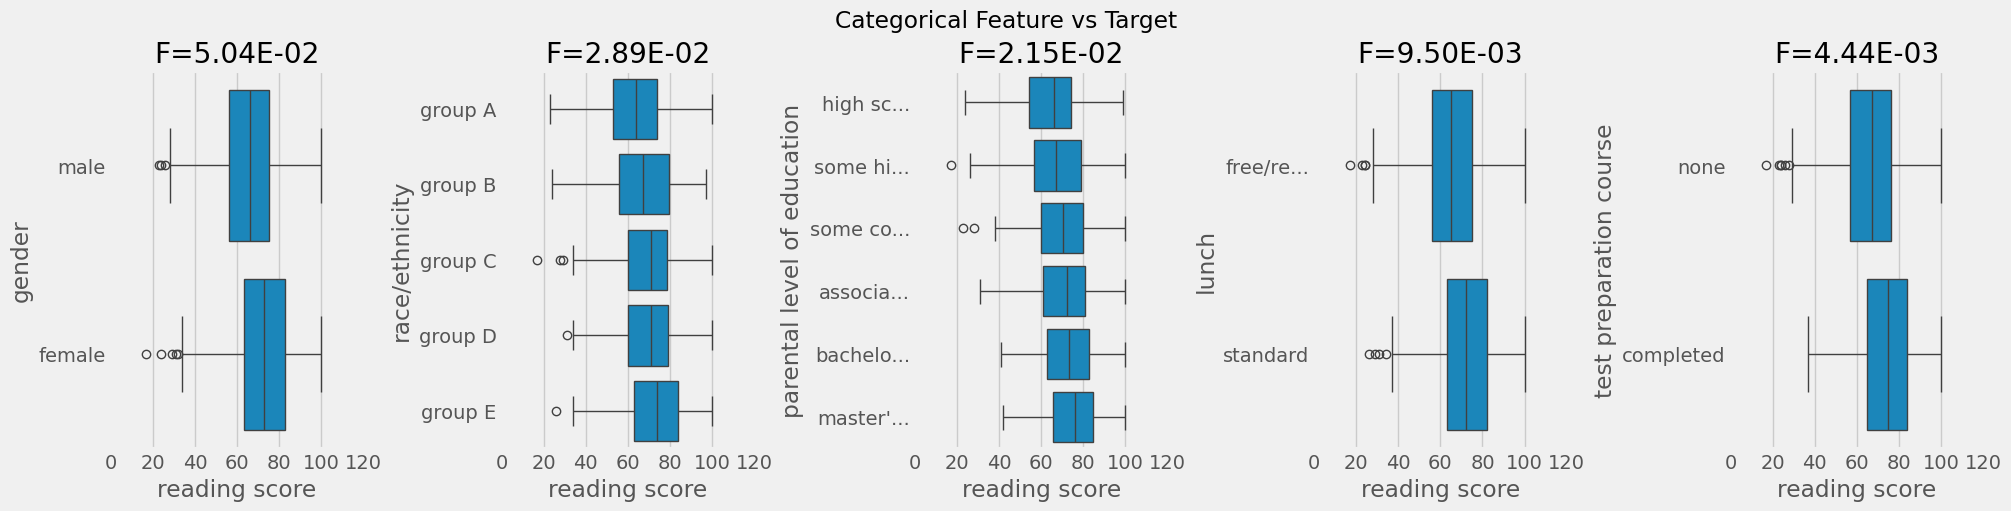

In [284]:
plt.rcParams['figure.figsize']=(18,6)
plt.style.use('fivethirtyeight')
dabl.plot(data,target_col='reading score')

In [285]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [286]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

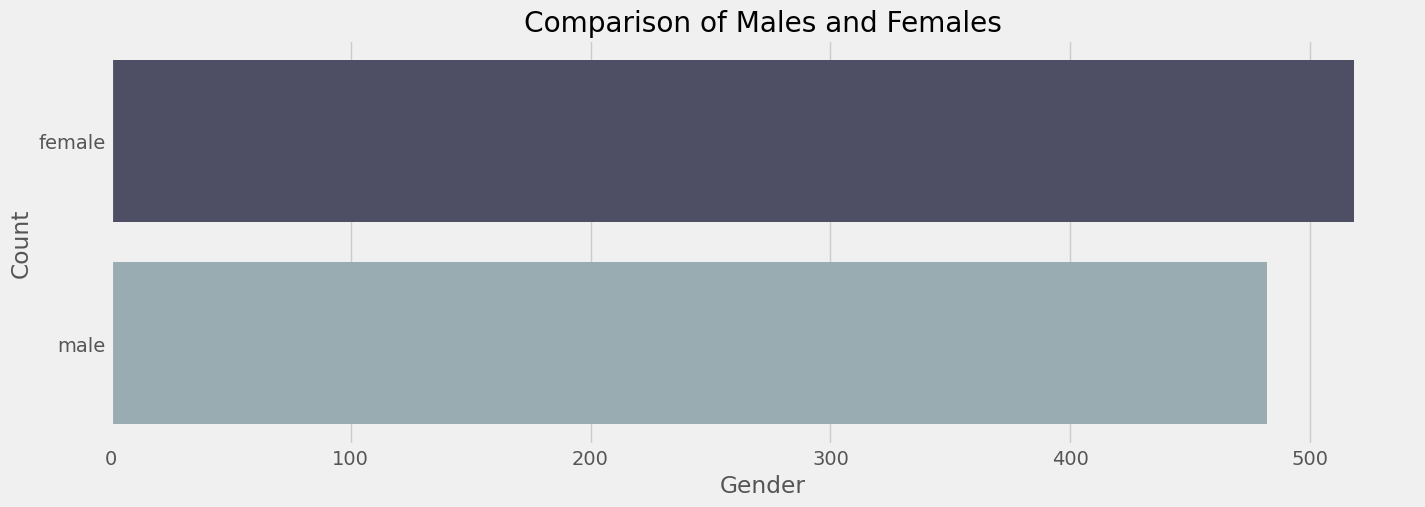

In [287]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

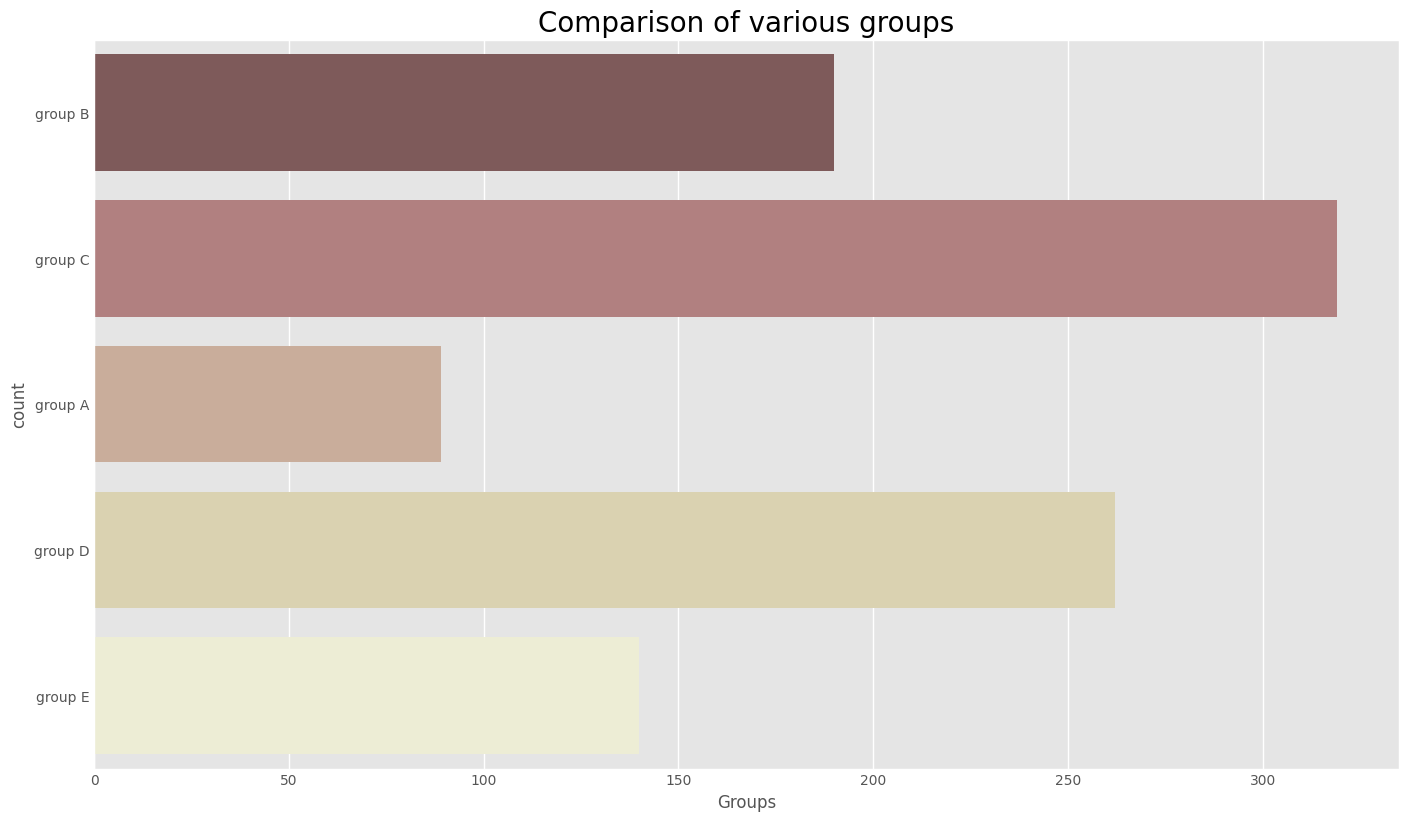

In [288]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

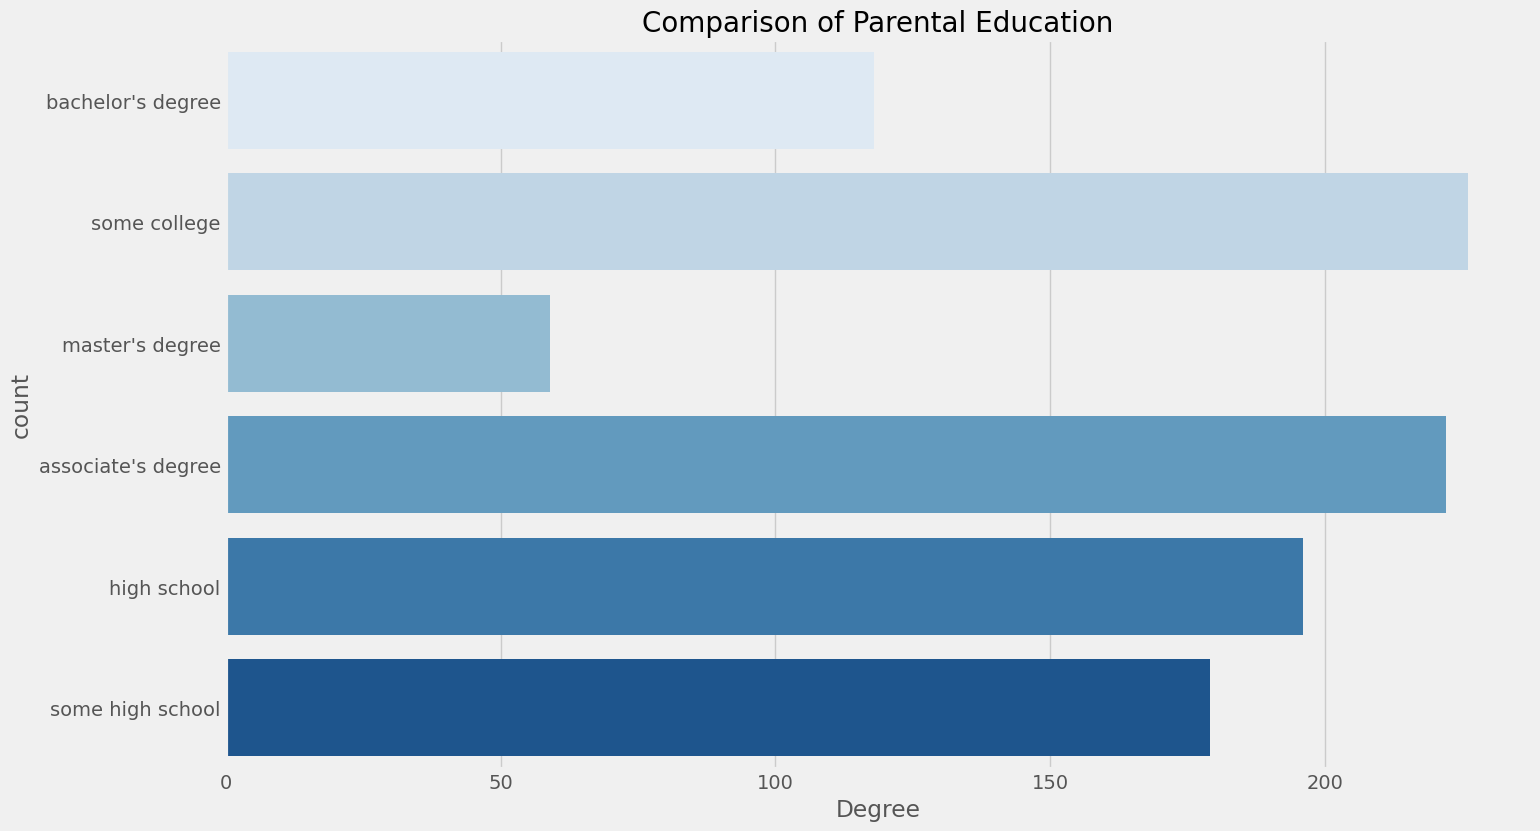

In [289]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [290]:
# plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('tableau-colorblind10')

# sns.countplot(data['math score'], palette = 'BuPu')
# plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
# plt.xlabel('score')
# plt.ylabel('count')
# plt.xticks(rotation = 90)
# plt.show()

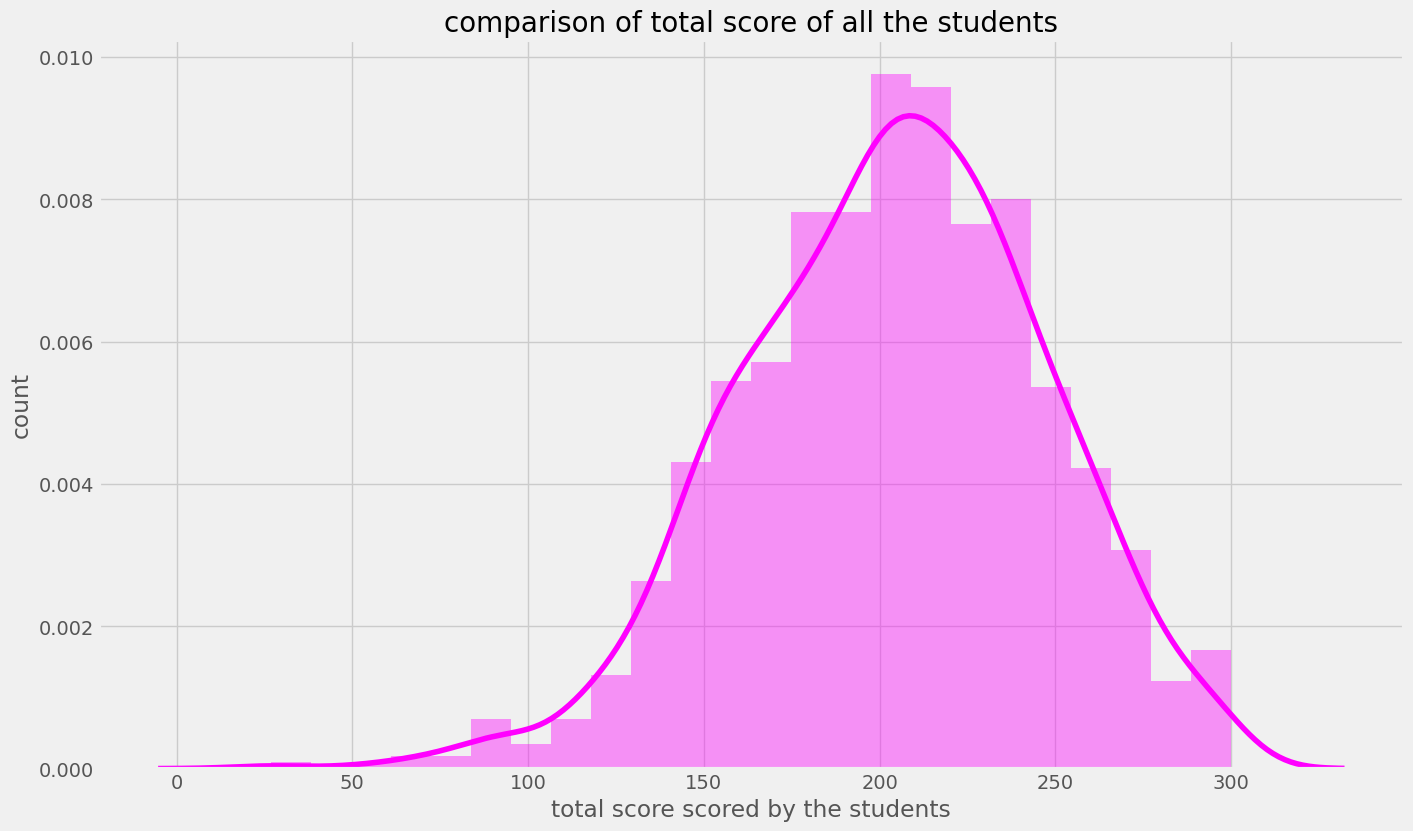

In [291]:
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

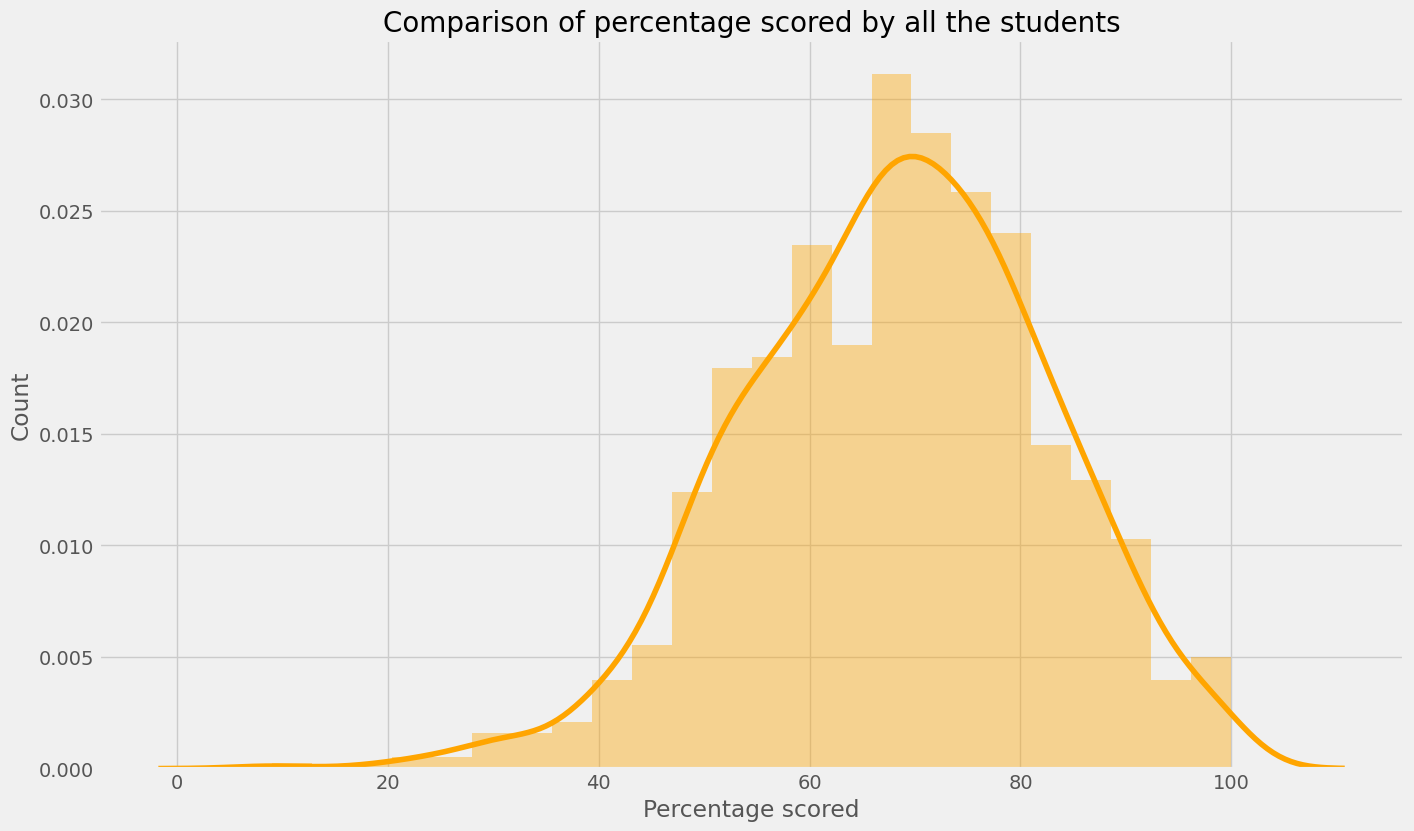

In [292]:
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [293]:
# data['percentage']=data[['math score','reading score','writing score']].mean(axis=1)

# data['status']=data['percentage'].apply(lambda x: "Fail" if x<40 else "Pass")

# def getgrade(percentage,status):
#     if status=="Fail":
#         return "E"
#     if percentage>=90:
#         return 'O'
#     if percentage >=80:
#         return "A"
#     if percentage >=70:
#         return "B"
#     if percentage >=60:
#         return "C"
#     if percentage >=50:
#         return "D"
#     else:
#         return "E"

# data['grades']=data.apply(lambda x: getgrade(x['percentage'],x['status']),axis=1)

# print(data['grades'].value_counts())

In [318]:
# Ensure percentage column exists
data['percentage'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create the status column based on the percentage
data['status'] = data['percentage'].apply(lambda x: 'Fail' if x < 40 else 'Pass')

# Function to calculate grade
def getgrade(percentage, status):
    if status == 'Fail':
        return 'E'
    if percentage >= 90:
        return 'O'
    if percentage >= 80:
        return 'A'
    if percentage >= 70:
        return 'B'
    if percentage >= 60:
        return 'C'
    if percentage >= 40:
        return 'D'
    else:
        return 'E'

# Apply the function to assign grades
# 2 ta columns milay grades ber kora
data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis=1)

# Check grade distribution
print(data['grades'].value_counts())


grades
D    501
E    369
C    106
B     24
Name: count, dtype: int64


In [317]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,status,grades
0,0,2,1,1,1,52,44,50,218,48.666667,Pass,D
1,0,3,4,1,0,49,62,64,247,58.333333,Pass,D
2,0,2,3,1,1,70,67,69,278,68.666667,Pass,C
3,1,1,0,0,1,27,29,20,148,25.333333,Fail,E
4,1,3,4,1,1,56,50,51,229,52.333333,Pass,D


In [296]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['math score'] = le.fit_transform(data['math score'])

# label encoding for pass_reading
data['reading score'] = le.fit_transform(data['reading score'])

# label encoding for pass_writing
data['writing score'] = le.fit_transform(data['writing score'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

In [297]:
print(data.shape)

# If there are 9 columns (for example), the target is in column 8 (0-based index)
x = data.iloc[:, :-1]  # Select all columns except the last one
y = data.iloc[:, -1]   # Select the last column as the target variable

# Now check the shapes of x and y
print(x.shape)
print(y.shape)

(1000, 12)
(1000, 11)
(1000,)


In [298]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 11)
(750,)
(250, 11)
(250,)


In [299]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [300]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.61213997e-01 2.21609818e-01 2.04354209e-01 1.25220961e-01
 9.48805259e-02 6.90988686e-02 1.91494434e-02 2.98249466e-03
 1.43873328e-03 5.09479288e-05 4.26416658e-33]


In [301]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.42533333333333334
Testing Accuracy : 0.42


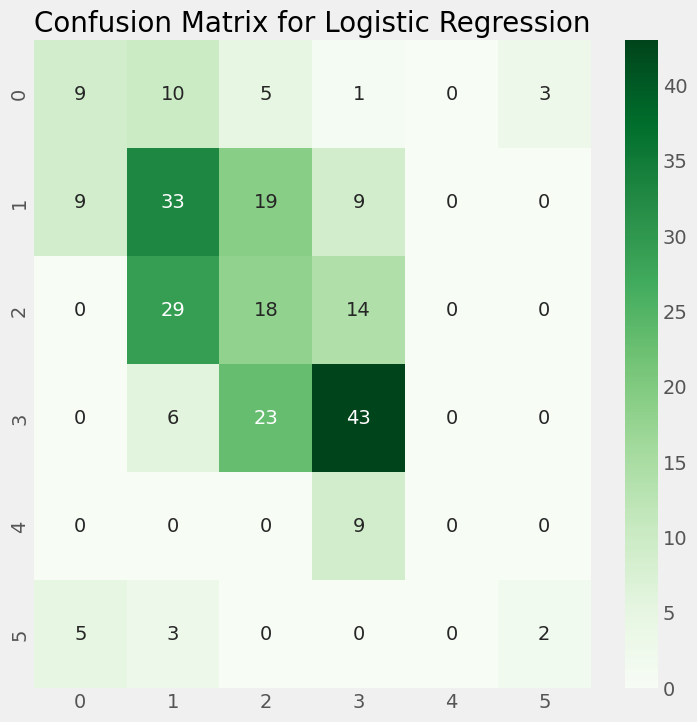

In [302]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [303]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.836


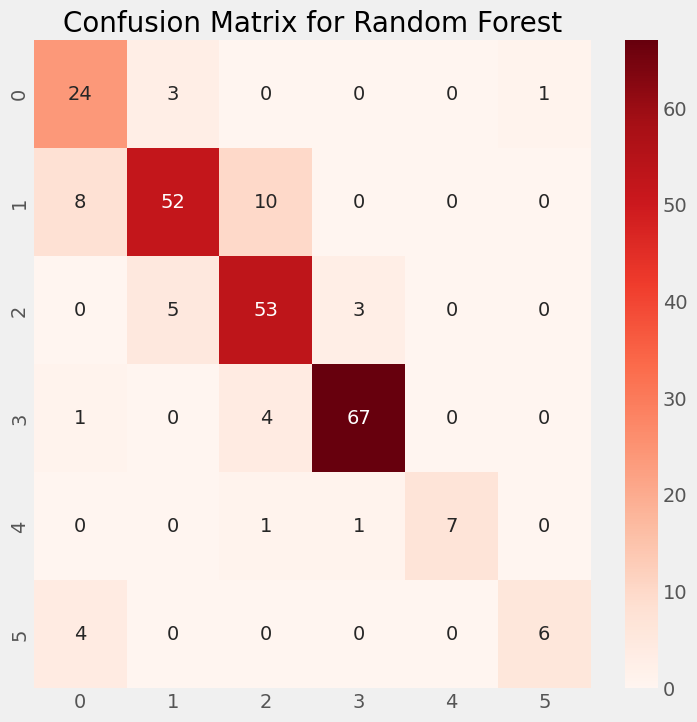

In [304]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

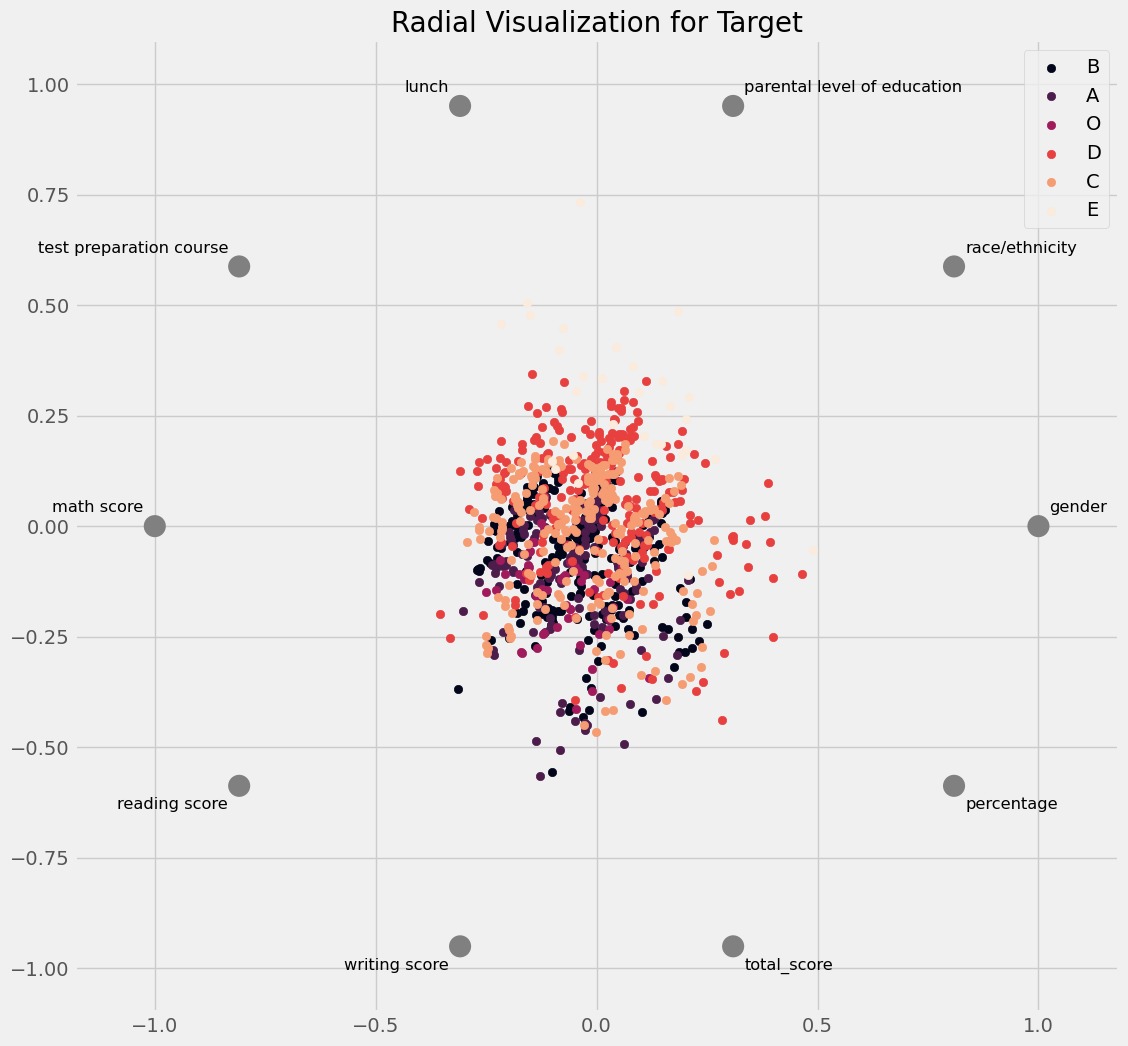

In [305]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

In [306]:
print(x)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               2                            1      1   
1         0               3                            4      1   
2         0               2                            3      1   
3         1               1                            0      0   
4         1               3                            4      1   
..      ...             ...                          ...    ...   
995       0               5                            3      1   
996       1               3                            2      0   
997       0               3                            2      0   
998       0               4                            4      1   
999       0               4                            4      0   

     test preparation course  math score  reading score  writing score  \
0                          1          52             44             50   
1                          0          49       

In [307]:
y

0      B
1      A
2      O
3      D
4      B
      ..
995    O
996    D
997    C
998    B
999    A
Name: grades, Length: 1000, dtype: object

In [308]:
data.shape

(1000, 12)

In [309]:
x.shape

(1000, 11)

In [310]:
y.shape

(1000,)

In [311]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,status,grades
0,0,2,1,1,1,52,44,50,218,72.666667,1,B
1,0,3,4,1,0,49,62,64,247,82.333333,1,A
2,0,2,3,1,1,70,67,69,278,92.666667,1,O
3,1,1,0,0,1,27,29,20,148,49.333333,1,D
4,1,3,4,1,1,56,50,51,229,76.333333,1,B
